In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import os
import json
import math

In [2]:
fps = [os.path.join('tests', x) for x in os.listdir('tests') if x.endswith('.json')]

datas = []
for fp in fps:
    with open(fp) as f:
        data = json.load(f)
    testWalk = data['testPathfinder']
    testWalk = [pd.json_normalize(x) for x in testWalk]
    datas.extend(testWalk)

df = pd.concat(datas, ignore_index=True)

In [3]:
df.head()

,args,startTimestamp,error,traceback,endTimestamp,duration,success,kwargs.canBreak,startEnvironment.player.name,startEnvironment.player.pos,...,endEnvironment.world.weather.thundering,endEnvironment.world.weather.isDay,endEnvironment.world.weather.isNight,endEnvironment.world.weather.moonPhase,endEnvironment.client.version,endEnvironment.client.modLoader,endEnvironment.client.fps,kwargs.canPlace,result.kwargs.canPlace,result
0,[],1.700434e+09,None,None,1.700434e+09,0.126354,True,False,Ailicia,"[1021771.5, 64.0, 1070443.5]",...,False,True,False,2,1.20.1-forge-47.2.0,Forge,676 fps T: inffast B: 2 GPU: 28%,NaN,NaN,NaN
1,[],1.700434e+09,None,None,1.700434e+09,0.396056,True,False,Ailicia,"[1023723.5, 61.30724333434485, 1075655.5]",...,False,True,False,2,1.20.1-forge-47.2.0,Forge,364 fps T: inffast B: 2 GPU: 28%,NaN,NaN,NaN
2,[],1.700434e+09,None,None,1.700434e+09,0.061727,True,False,Ailicia,"[1029930.5, 66.0, 1084300.5]",...,False,True,False,2,1.20.1-forge-47.2.0,Forge,667 fps T: inffast B: 2 GPU: 28%,NaN,NaN,NaN
3,[],1.700434e+09,None,None,1.700434e+09,0.080046,True,False,Ailicia,"[1036160.5, 113.0, 1086411.5]",...,False,True,False,2,1.20.1-forge-47.2.0,Forge,435 fps T: inffast B: 2 GPU: 28%,NaN,NaN,NaN
4,[],1.700434e+09,None,None,1.700434e+09,0.043302,True,False,Ailicia,"[1042827.5, 63.0, 1093526.5]",...,False,True,False,2,1.20.1-forge-47.2.0,Forge,404 fps T: inffast B: 2 GPU: 28%,NaN,NaN,NaN


In [4]:
df.shape

(140, 71)

In [5]:
print(df.columns)

Index(['args', 'startTimestamp', 'error', 'traceback', 'endTimestamp',
       'duration', 'success', 'kwargs.canBreak',
       'startEnvironment.player.name', 'startEnvironment.player.pos',
       'startEnvironment.player.gamemode', 'startEnvironment.world.identifier',
       'startEnvironment.world.time', 'startEnvironment.world.timeOfDay',
       'startEnvironment.world.dimension', 'startEnvironment.world.biome',
       'startEnvironment.world.difficulty',
       'startEnvironment.world.weather.raining',
       'startEnvironment.world.weather.thundering',
       'startEnvironment.world.weather.isDay',
       'startEnvironment.world.weather.isNight',
       'startEnvironment.world.weather.moonPhase',
       'startEnvironment.client.version', 'startEnvironment.client.modLoader',
       'startEnvironment.client.fps', 'result.args', 'result.kwargs.canBreak',
       'result.start', 'result.end', 'result.pathLength',
       'result.walkConfig.canBreak', 'result.walkConfig.canPlace',
      

In [6]:
print(df['error'].value_counts())

Path not found    8
Name: error, dtype: int64


In [7]:
print(df['result.walkConfig.canBreak'].value_counts())
print(df['result.walkConfig.canPlace'].value_counts())

False    66
True     66
Name: result.walkConfig.canBreak, dtype: int64
True     66
False    66
Name: result.walkConfig.canPlace, dtype: int64


In [8]:
def getCategory(x):
    if x['result.walkConfig.canBreak'] == True and x['result.walkConfig.canPlace'] == True:
        return 'Break and Place\n50 testes'
    elif x['result.walkConfig.canBreak'] == True:
        return 'Break Only\n20 testes'
    elif x['result.walkConfig.canPlace'] == True:
        return 'Place Only\n20 testes'
    elif pd.isnull(x['result.walkConfig.canBreak']) and pd.isnull(x['result.walkConfig.canPlace']):
        return 'Fail'
    else:
        return 'NoBreak and NoPlace\n50 testes'

In [9]:
df['category'] = df.apply(getCategory, axis=1)
df['category'].value_counts()

Break and Place\n50 testes        46
NoBreak and NoPlace\n50 testes    46
Place Only\n20 testes             20
Break Only\n20 testes             20
Fail                               8
Name: category, dtype: int64

In [10]:
def getLength(x):
    try:
        # get the number of open in the last iteration of pathfinder
        return len(x[-1])
    except:
        return None

In [11]:
df['openNodes'] = df['result.walkConfig.explorationMap.openList'].apply(lambda x: getLength(x))
print('Mean of open nodes: ', df['openNodes'].mean())

df['closedNodes'] = df['result.walkConfig.explorationMap.closedList'].apply(lambda x: getLength(x))
print('Mean of closed nodes: ', df['closedNodes'].mean())

df['totalNodes'] = df['openNodes'] + df['closedNodes']
print('Mean of total nodes: ', df['totalNodes'].mean())

Mean of open nodes:  206.8560606060606
Mean of closed nodes:  111.54545454545455
Mean of total nodes:  318.4015151515151


In [12]:
# df['duration']
print('Mean duration:', df['duration'].mean())

categoryGroups = df.groupby('category')
categoryGroups['duration'].mean()


Mean duration: 0.38145657096590313


category
Break Only\n20 testes             0.294859
Break and Place\n50 testes        0.152087
Fail                              3.178251
NoBreak and NoPlace\n50 testes    0.248460
Place Only\n20 testes             0.182779
Name: duration, dtype: float64

In [13]:
categoryGroups['totalNodes'].mean()

category
Break Only\n20 testes             359.650000
Break and Place\n50 testes        292.413043
Fail                                     NaN
NoBreak and NoPlace\n50 testes    329.717391
Place Only\n20 testes             310.900000
Name: totalNodes, dtype: float64

C:\Users\mdabe\AppData\Local\Temp\ipykernel_7640\3565278519.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean = data.mean()
C:\Users\mdabe\AppData\Local\Temp\ipykernel_7640\3565278519.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(mean.index, rotation=0)


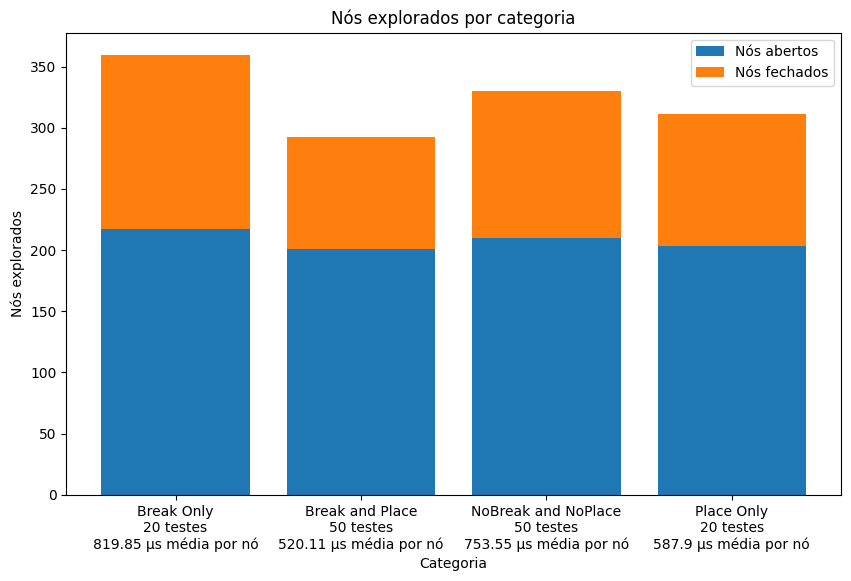

In [14]:
# plot bar with open nodes and closed nodes / ignore fail
# stacked bar
data = df[df['category'] != 'Fail']
group = data.groupby('category')
duration = group['duration'].mean() / group['totalNodes'].mean() # in seconds

#data['category'] = data['category'] + '\n' + str(round(duration*1_000_000, 2)) + ' µs média por nó'
rename = {}
for i in data['category']:
    rename[i] = i + '\n' + str(round(duration[i]*1_000_000, 2)) + ' µs média por nó'

data = data.replace(rename)
data = data.groupby('category')

mean = data.mean()
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Nós explorados por categoria')
ax.set_ylabel('Nós explorados')
ax.set_xlabel('Categoria')
ax.set_xticklabels(mean.index, rotation=0)
ax.bar(mean.index, mean['openNodes'], label='Nós abertos')
ax.bar(mean.index, mean['closedNodes'], bottom=mean['openNodes'], label='Nós fechados')
# add subtitle of category with mean['totalNodes']/mean['duration']

ax.legend()
plt.show()
